In [47]:
# importing Required Modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind

#Suppresing Warnings
import warnings
warnings.filterwarnings('ignore')

In [48]:
# Data Ingestion
data = pd.read_csv("mushrooms.csv")
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [49]:
#Checking the shape of data
data.shape

(8124, 23)

In [50]:
# Checking the dtype of Columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [51]:
# Checking for Null Values
data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [52]:
# Checking for duplicated Values
data.duplicated().sum()

0

In [53]:
# Checking for unique values in each column
for i in data.columns:
    print(f"\n{i} : {data[i].unique()}")


class : ['p' 'e']

cap-shape : ['x' 'b' 's' 'f' 'k' 'c']

cap-surface : ['s' 'y' 'f' 'g']

cap-color : ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']

bruises : ['t' 'f']

odor : ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']

gill-attachment : ['f' 'a']

gill-spacing : ['c' 'w']

gill-size : ['n' 'b']

gill-color : ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']

stalk-shape : ['e' 't']

stalk-root : ['e' 'c' 'b' 'r' '?']

stalk-surface-above-ring : ['s' 'f' 'k' 'y']

stalk-surface-below-ring : ['s' 'f' 'y' 'k']

stalk-color-above-ring : ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']

stalk-color-below-ring : ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']

veil-type : ['p']

veil-color : ['w' 'n' 'o' 'y']

ring-number : ['o' 't' 'n']

ring-type : ['p' 'e' 'l' 'f' 'n']

spore-print-color : ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']

population : ['s' 'n' 'a' 'v' 'y' 'c']

habitat : ['u' 'g' 'm' 'd' 'p' 'w' 'l']


Attribute Information:
classes: edible=e, poisonous=p

cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s

cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

bruises: bruises=t,no=f

odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

gill-attachment: attached=a,descending=d,free=f,notched=n

gill-spacing: close=c,crowded=w,distant=d

gill-size: broad=b,narrow=n

gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

stalk-shape: enlarging=e,tapering=t

stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

veil-type: partial=p,universal=u

veil-color: brown=n,orange=o,white=w,yellow=y

ring-number: none=n,one=o,two=t

ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

In [54]:
data = data.replace({
    "class":{'e':'edible','p':'poisonous'},
    "cap-shape":{'b':'bell','c':'conical','x':'convex','f':'flat','k':'knobbed','s':'sunken'},
    "cap-surface":{'f':'fibrous','g':'grooves','y':'scaly','s':'smooth'},
    "cap-color":{'n':'brown','b':'buff','c':'cinnamon','g':'gray','r':'green','p':'pink','u':'purple','e':'red','w':'white','y':'yellow'},
    "bruises":{'t':'yes','f':'no'},
    "odor":{'a':'almond','l':'anise','c':'creosote','y':'fishy','f':'foul','m':'musty','n':'none','p':'pungent','s':'spicy'},
    "gill-attachment":{'a':'attached','d':'descending','f':'free','n':'notched'},
    "gill-spacing":{'c':'close','w':'crowded','d':'distant'},
    "gill-size":{'b':'broad','n':'narrow'},
    "gill-color":{'k':'black','n':'brown','b':'buff','h':'chocolate','g':'gray','r':'green','o':'orange','p':'pink','u':'purple','e':'red',
                  'w':'white','y':'yellow'},
    "stalk-shape":{'e':'enlarging','t':'tapering'},
    "stalk-root":{'b':'bulbous','c':'club','u':'cup','e':'equal','z':'rhizomorphs','r':'rooted'},
    "stalk-surface-above-ring":{'f':'fibrous','y':'scaly','k':'silky','s':'smooth'},
    "stalk-surface-below-ring":{'f':'fibrous','y':'scaly','k':'silky','s':'smooth'},
    "stalk-color-above-ring":{'n':'brown','b':'buff','c':'cinnamon','g':'gray','o':'orange','p':'pink','e':'red','w':'white','y':'yellow'},
    "stalk-color-below-ring":{'n':'brown','b':'buff','c':'cinnamon','g':'gray','o':'orange','p':'pink','e':'red','w':'white','y':'yellow'},
    "veil-type":{'p':'partial','u':'universal'},
    "veil-color":{'n':'brown','o':'orange','w':'white','y':'yellow'},
    "ring-number":{'n':'none','o':'one','t':'two'},
    "ring-type":{'c':'cobwebby','e':'evanescent','f':'flaring','l':'large','n':'none','p':'pendant','s':'sheathing','z':'zone'},
    "spore-print-color":{'k':'black','n':'brown','b':'buff','h':'chocolate','r':'green','o':'orange','u':'purple','w':'white','y':'yellow'},
    "population":{'a':'abundant','c':'clustered','n':'numerous','s':'scattered','v':'several','y':'solitary'},
    "habitat":{'g':'grasses','l':'leaves','m':'meadows','p':'paths','u':'urban','w':'waste','d':'woods'}  
})

In [55]:
data['stalk-root'] = data['stalk-root'].replace(to_replace='?',value=data['stalk-root'].value_counts().idxmax())

In [56]:
data['stalk-root'].unique()

array(['equal', 'club', 'bulbous', 'rooted'], dtype=object)

In [57]:
data['stalk-root'].value_counts().idxmax()

'bulbous'

In [58]:
old_columns = ['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat']

new_columns = ['class', 'cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor',
       'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color',
       'stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
       'stalk_surface_below_ring', 'stalk_color_above_ring',
       'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number',
       'ring_type', 'spore_print_color', 'population', 'habitat']
data.rename(columns=dict(zip(old_columns, new_columns)), inplace=True)

In [59]:
data = data.drop(['veil_type'],axis=1)

In [60]:
for i in data.columns:
    print(i,":",data[i].nunique(),"\n",data[i].unique(),"\n")

class : 2 
 ['poisonous' 'edible'] 

cap_shape : 6 
 ['convex' 'bell' 'sunken' 'flat' 'knobbed' 'conical'] 

cap_surface : 4 
 ['smooth' 'scaly' 'fibrous' 'grooves'] 

cap_color : 10 
 ['brown' 'yellow' 'white' 'gray' 'red' 'pink' 'buff' 'purple' 'cinnamon'
 'green'] 

bruises : 2 
 ['yes' 'no'] 

odor : 9 
 ['pungent' 'almond' 'anise' 'none' 'foul' 'creosote' 'fishy' 'spicy'
 'musty'] 

gill_attachment : 2 
 ['free' 'attached'] 

gill_spacing : 2 
 ['close' 'crowded'] 

gill_size : 2 
 ['narrow' 'broad'] 

gill_color : 12 
 ['black' 'brown' 'gray' 'pink' 'white' 'chocolate' 'purple' 'red' 'buff'
 'green' 'yellow' 'orange'] 

stalk_shape : 2 
 ['enlarging' 'tapering'] 

stalk_root : 4 
 ['equal' 'club' 'bulbous' 'rooted'] 

stalk_surface_above_ring : 4 
 ['smooth' 'fibrous' 'silky' 'scaly'] 

stalk_surface_below_ring : 4 
 ['smooth' 'fibrous' 'scaly' 'silky'] 

stalk_color_above_ring : 9 
 ['white' 'gray' 'pink' 'brown' 'buff' 'red' 'orange' 'cinnamon' 'yellow'] 

stalk_color_below_rin

In [61]:
#data.to_csv("mushrooms_data.csv", index=False, header=True)

In [62]:
data.columns

Index(['class', 'cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor',
       'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color',
       'stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
       'stalk_surface_below_ring', 'stalk_color_above_ring',
       'stalk_color_below_ring', 'veil_color', 'ring_number', 'ring_type',
       'spore_print_color', 'population', 'habitat'],
      dtype='object')

### Univariate Analysis

In [63]:
for i in data.columns:
    print(i,":\n",data[i].value_counts(),"\n")

class :
 class
edible       4208
poisonous    3916
Name: count, dtype: int64 

cap_shape :
 cap_shape
convex     3656
flat       3152
knobbed     828
bell        452
sunken       32
conical       4
Name: count, dtype: int64 

cap_surface :
 cap_surface
scaly      3244
smooth     2556
fibrous    2320
grooves       4
Name: count, dtype: int64 

cap_color :
 cap_color
brown       2284
gray        1840
red         1500
yellow      1072
white       1040
buff         168
pink         144
cinnamon      44
purple        16
green         16
Name: count, dtype: int64 

bruises :
 bruises
no     4748
yes    3376
Name: count, dtype: int64 

odor :
 odor
none        3528
foul        2160
fishy        576
spicy        576
almond       400
anise        400
pungent      256
creosote     192
musty         36
Name: count, dtype: int64 

gill_attachment :
 gill_attachment
free        7914
attached     210
Name: count, dtype: int64 

gill_spacing :
 gill_spacing
close      6812
crowded    1312
Name: count

### class

Text(0.5, 1.0, 'Mushroom Class')

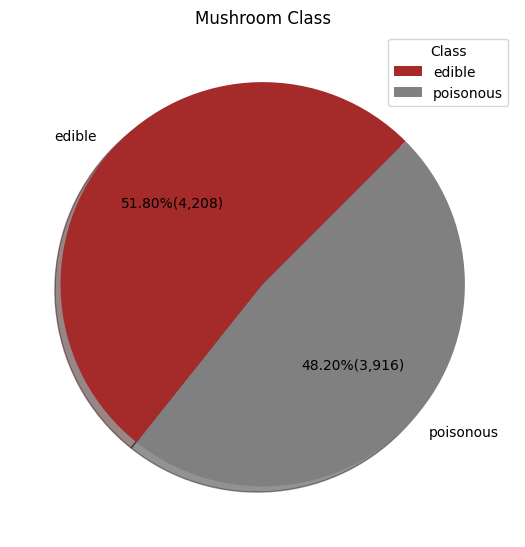

In [67]:
plt.figure(figsize=(30,10))

ax1 = plt.subplot2grid((1,4),(0,0))

dataClass = data['class'].value_counts().values
labelClass = data['class'].value_counts().index

plt.pie(x=dataClass, labels=labelClass,
        autopct=lambda p : '{:.2f}%({:,.0f})'.format(p,p * sum(dataClass)/100), colors=['brown','gray'], shadow=True, startangle=45)
plt.legend(labelClass, loc='best', title='Class')
plt.title("Mushroom Class")

### bruises

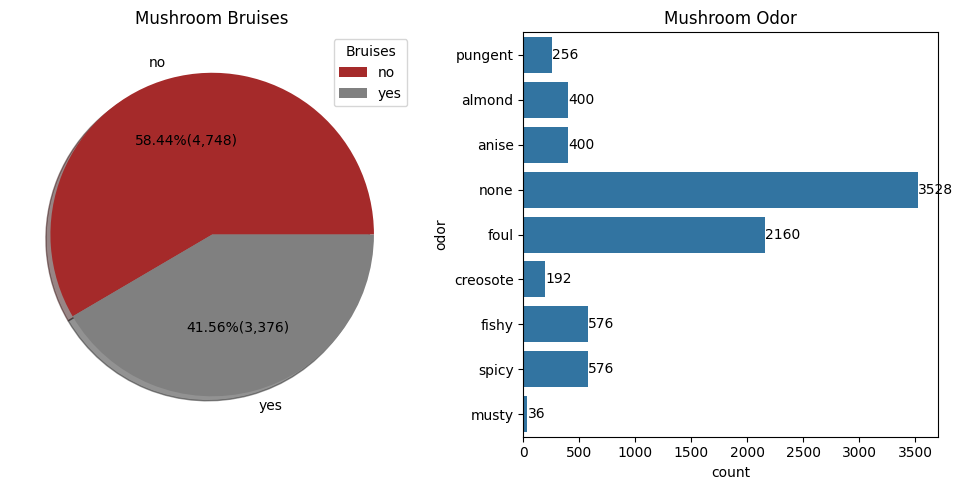

In [71]:
plt.figure(figsize=(20,5))

ax2 = plt.subplot2grid((1,4),(0,1))

dataBruises = data['bruises'].value_counts().values
labelbruises = data['bruises'].value_counts().index

plt.pie(x=dataBruises, labels=labelbruises,
        autopct=lambda p : '{:.2f}%({:,.0f})'.format(p,p * sum(dataBruises)/100), colors=['brown','gray'], shadow=True)
plt.legend(labelbruises, loc='best', title='Bruises')
plt.title("Mushroom Bruises")

# odor

ax3 = plt.subplot2grid((1,4),(0,2))

sns.countplot(y='odor', data=data, ax=ax3)
for i in ax3.containers:
        ax3.bar_label(i)
plt.title("Mushroom Odor")

plt.tight_layout()
plt.show()

### cap_shape, cap_surface, cap_color

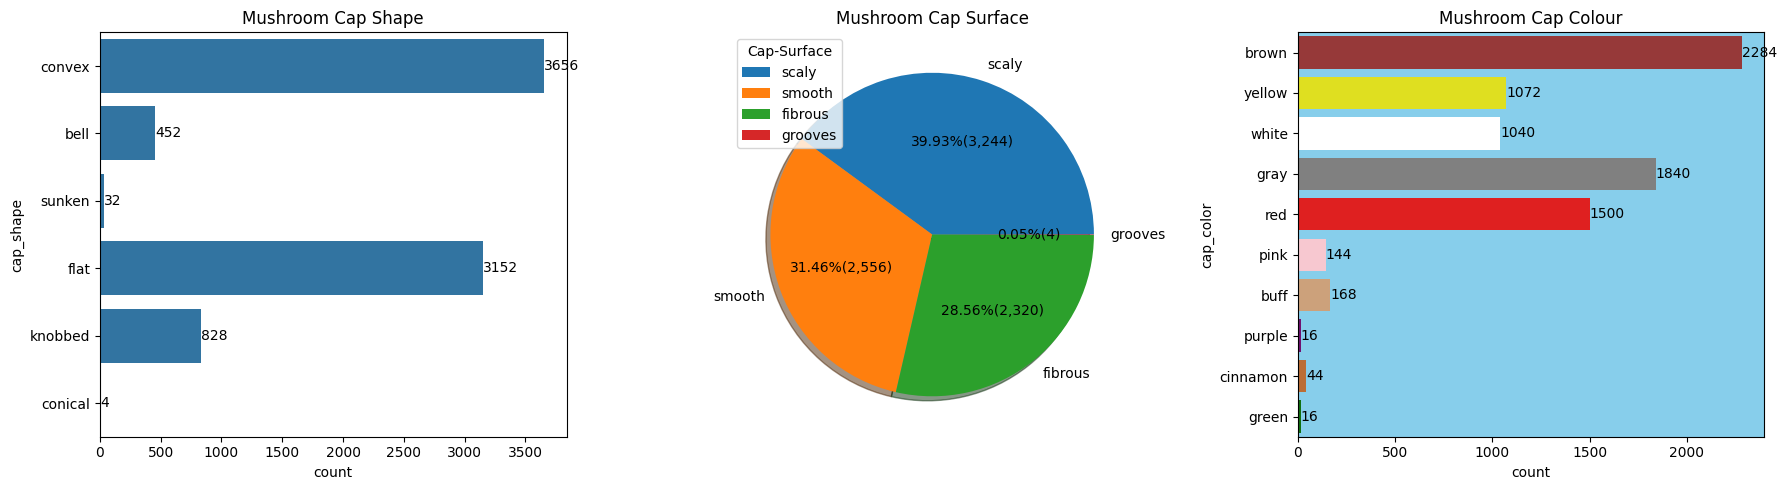

In [77]:
plt.figure(figsize=(18,5))

# cap_shape

ax1 = plt.subplot2grid((1,3),(0,0))

sns.countplot(y="cap_shape", data=data, ax=ax1)
for i in ax1.containers:
        ax1.bar_label(i)
plt.title("Mushroom Cap Shape")

# cap-surface

ax2 = plt.subplot2grid((1,3),(0,1))

dataCapSurface = data['cap_surface'].value_counts().values
labelCapSurface = data['cap_surface'].value_counts().index

plt.pie(x=dataCapSurface, labels=labelCapSurface,
        autopct=lambda p : '{:.2f}%({:,.0f})'.format(p,p * sum(dataCapSurface)/100), shadow=True)
plt.legend(labelCapSurface, loc='upper left', title='Cap-Surface')
plt.title("Mushroom Cap Surface")

# cap-color

ax3 = plt.subplot2grid((1,3),(0,2))

sns.countplot(y='cap_color', data=data, ax=ax3, palette=['#A52A2A','#FFFF00','#FFFFFF','#808080','#FF0000','#FFC0CB','#DAA06D',
                                                             '#800080','#D2691E','#008000'])
for i in ax3.containers:
        ax3.bar_label(i)
ax3.set_facecolor('skyblue')
plt.title("Mushroom Cap Colour")

plt.tight_layout()
plt.show()

### gill_attachment, gill_spacing, gill_size, gill_color

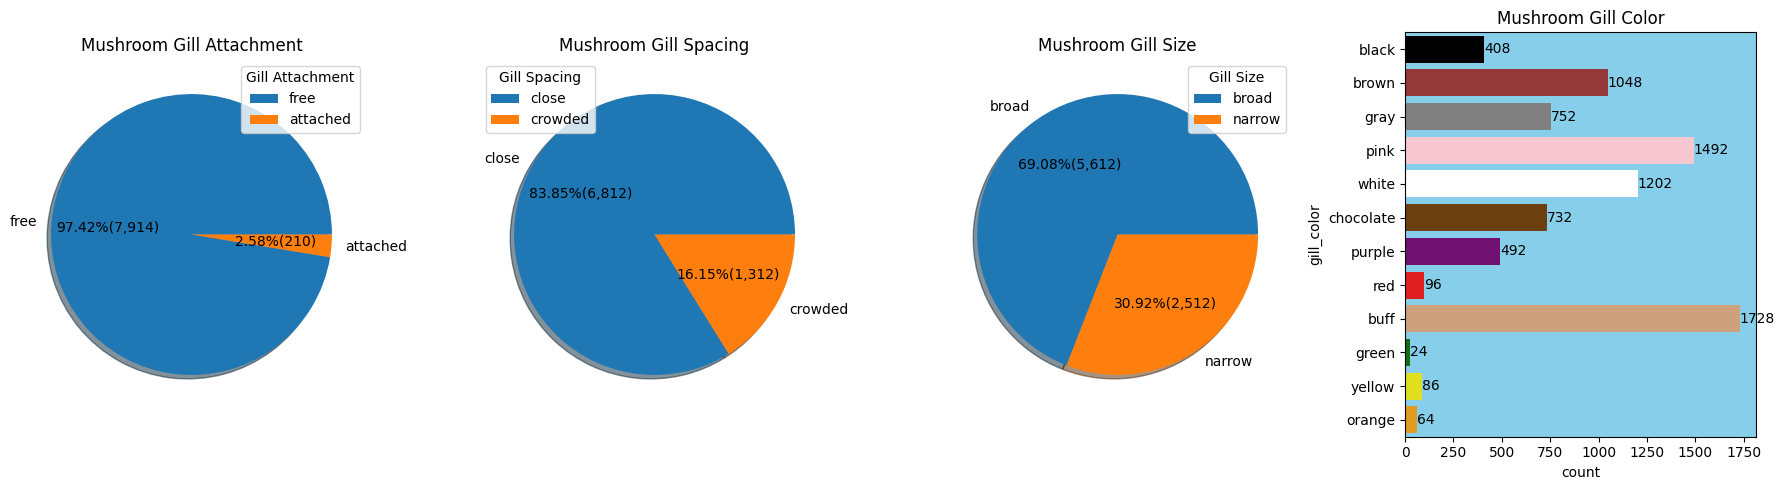

In [76]:
plt.figure(figsize=(18,5))

# gill_attachment

ax1 = plt.subplot2grid((1,4),(0,0))

dataGillAttachment = data['gill_attachment'].value_counts().values
labelGillAttachment = data['gill_attachment'].value_counts().index

plt.pie(x=dataGillAttachment, labels=labelGillAttachment,
        autopct=lambda p : '{:.2f}%({:,.0f})'.format(p,p * sum(dataGillAttachment)/100), shadow=True)
plt.legend(labelGillAttachment, loc='best', title='Gill Attachment')
plt.title("Mushroom Gill Attachment")

# gill-spacing

ax2 = plt.subplot2grid((1,4),(0,1))

dataGillSpacing = data['gill_spacing'].value_counts().values
labelGillSpacing = data['gill_spacing'].value_counts().index

plt.pie(x=dataGillSpacing, labels=labelGillSpacing,
        autopct=lambda p : '{:.2f}%({:,.0f})'.format(p,p * sum(dataGillSpacing)/100), shadow=True)
plt.legend(labelGillSpacing, loc='best', title='Gill Spacing')
plt.title("Mushroom Gill Spacing")

# gill-size

ax3 = plt.subplot2grid((1,4),(0,2))

dataGillSize = data['gill_size'].value_counts().values
labelGillSize = data['gill_size'].value_counts().index

plt.pie(x=dataGillSize, labels=labelGillSize,
        autopct=lambda p : '{:.2f}%({:,.0f})'.format(p,p * sum(dataGillSize)/100), shadow=True)
plt.legend(labelGillSize, loc='best', title='Gill Size')
plt.title("Mushroom Gill Size")

# gill-color

ax4 = plt.subplot2grid((1,4),(0,3))

sns.countplot(y='gill_color', data=data, ax=ax4, 
              palette=['#000000','#A52A2A','#808080','#FFC0CB','#FFFFFF','#7B3F00','#800080','#FF0000','#DAA06D','#008000',
                       '#FFFF00','#FFA500'])
for i in ax4.containers:
        ax4.bar_label(i)
ax4.set_facecolor('skyblue')
plt.title("Mushroom Gill Color")

plt.tight_layout()
plt.show()

### stalk-shape, stalk-root

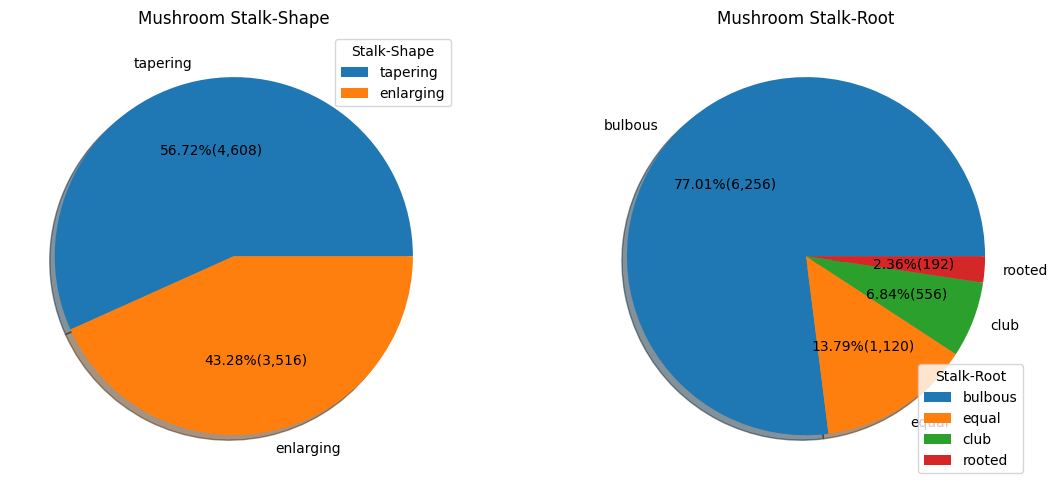

In [78]:
plt.figure(figsize=(12,5))

# stalk-shape

ax1 = plt.subplot2grid((1,2),(0,0))

dataStalkShape = data['stalk_shape'].value_counts().values
labelStalkShape = data['stalk_shape'].value_counts().index

plt.pie(x=dataStalkShape, labels=labelStalkShape,
        autopct=lambda p : '{:.2f}%({:,.0f})'.format(p,p * sum(dataStalkShape)/100), shadow=True)
plt.legend(labelStalkShape, loc='best', title='Stalk-Shape')
plt.title("Mushroom Stalk-Shape")

# stalk-root

ax2 = plt.subplot2grid((1,2),(0,1))

dataStalkRoot = data['stalk_root'].value_counts().values
labelStalkRoot = data['stalk_root'].value_counts().index

plt.pie(x=dataStalkRoot, labels=labelStalkRoot,
        autopct=lambda p : '{:.2f}%({:,.0f})'.format(p,p * sum(dataStalkRoot)/100), shadow=True)
plt.legend(labelStalkRoot, loc='best', title='Stalk-Root')
plt.title("Mushroom Stalk-Root")

plt.tight_layout()
plt.show()


### stalk_surface_above_ring, stalk_surface_below_ring

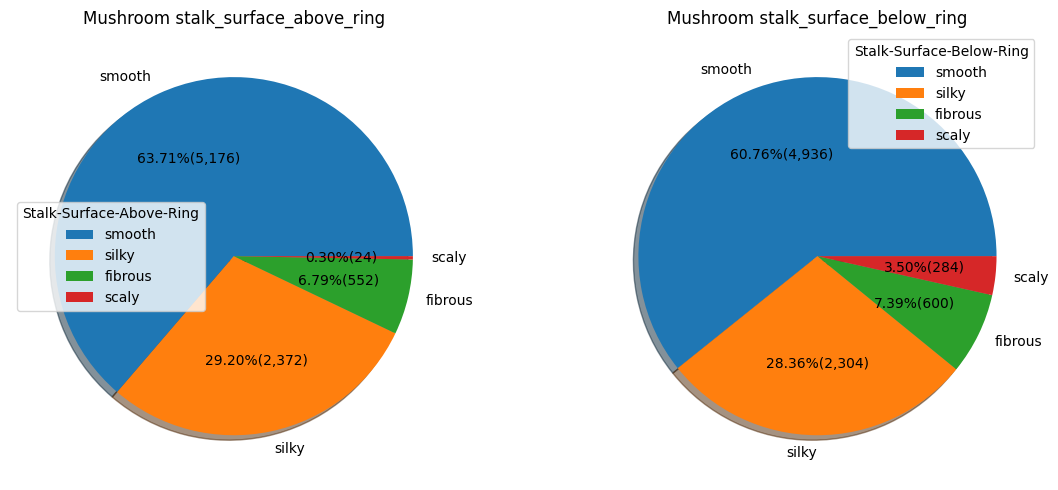

In [79]:
plt.figure(figsize=(12,5))

# stalk_surface_above_ring

ax1 = plt.subplot2grid((1,2),(0,0))

dataStalkSurfaceAboveRing = data['stalk_surface_above_ring'].value_counts().values
labelStalkSurfaceAboveRing = data['stalk_surface_above_ring'].value_counts().index

plt.pie(x=dataStalkSurfaceAboveRing, labels=labelStalkSurfaceAboveRing,
        autopct=lambda p : '{:.2f}%({:,.0f})'.format(p,p * sum(dataStalkSurfaceAboveRing)/100), shadow=True)
plt.legend(labelStalkSurfaceAboveRing, loc='best', title='Stalk-Surface-Above-Ring')
plt.title("Mushroom stalk_surface_above_ring")

# stalk_surface_below_ring

ax2 = plt.subplot2grid((1,2),(0,1))

dataStalkSurfaceBelowRing = data['stalk_surface_below_ring'].value_counts().values
labelStalkSurfaceBelowRing = data['stalk_surface_below_ring'].value_counts().index

plt.pie(x=dataStalkSurfaceBelowRing, labels=labelStalkSurfaceBelowRing,
        autopct=lambda p : '{:.2f}%({:,.0f})'.format(p,p * sum(dataStalkSurfaceBelowRing)/100), shadow=True)
plt.legend(labelStalkSurfaceBelowRing, loc='best', title='Stalk-Surface-Below-Ring')
plt.title("Mushroom stalk_surface_below_ring")

plt.tight_layout()
plt.show()

### stalk_color_above_ring, stalk_color_below_ring

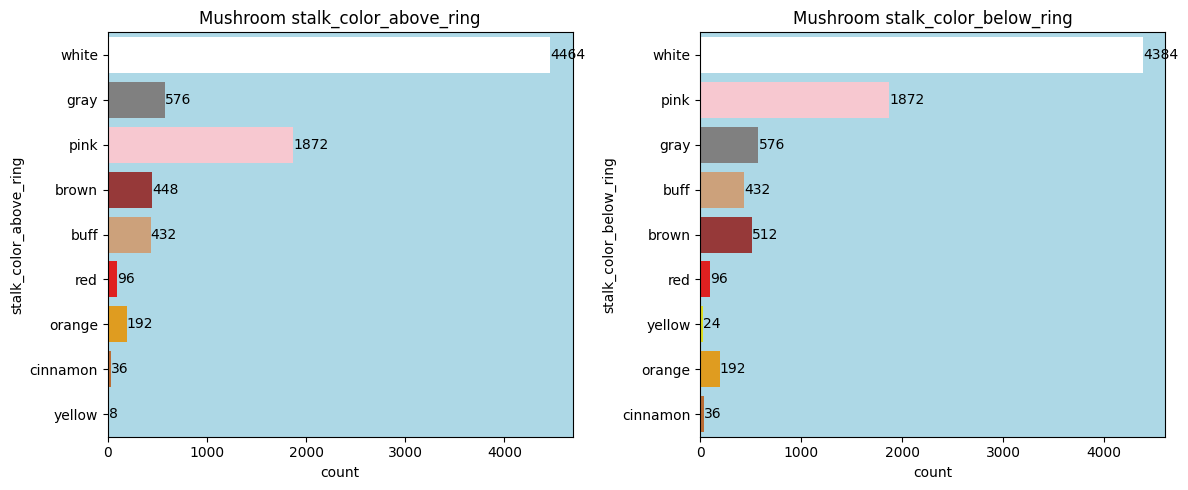

In [80]:
plt.figure(figsize=(12,5))

# stalk_color_above_ring

ax1 = plt.subplot2grid((1,2),(0,0))

sns.countplot(y='stalk_color_above_ring', data=data, ax=ax1, 
              palette=['#FFFFFF','#808080','#FFC0CB','#A52A2A','#DAA06D','#FF0000','#FFA500','#D2691E','#FFFF00'])
for i in ax1.containers:
        ax1.bar_label(i)
ax1.set_facecolor('lightblue')
plt.title("Mushroom stalk_color_above_ring")

# stalk_color_below_ring

ax2 = plt.subplot2grid((1,2),(0,1))

sns.countplot(y='stalk_color_below_ring', data=data, ax=ax2, 
              palette=['#FFFFFF','#FFC0CB','#808080','#DAA06D','#A52A2A','#FF0000','#FFFF00','#FFA500','#D2691E'])
for i in ax2.containers:
        ax2.bar_label(i)
ax2.set_facecolor('lightblue')
plt.title("Mushroom stalk_color_below_ring")

plt.tight_layout()
plt.show()

### veil_color, ring_number, ring_type

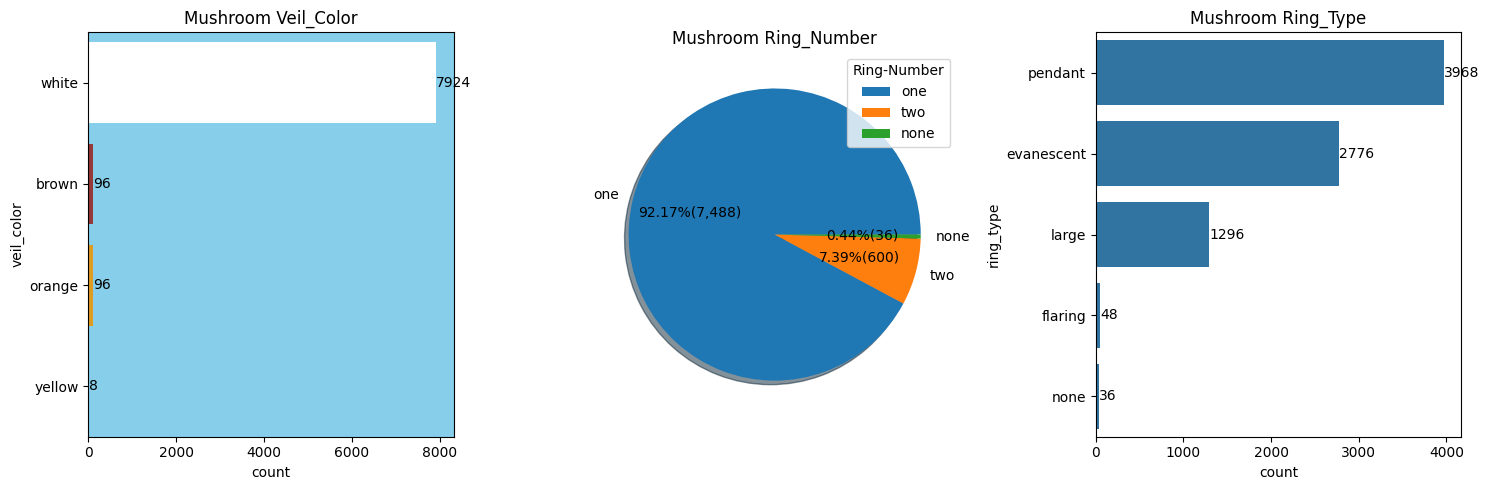

In [82]:
plt.figure(figsize=(15,5))

# veil_color

ax1 = plt.subplot2grid((1,3),(0,0))

sns.countplot(y='veil_color', data=data, ax=ax1, palette=['#FFFFFF','#A52A2A','#FFA500','#FFFF00'])
for i in ax1.containers:
    ax1.bar_label(i)
ax1.set_facecolor('skyblue')
plt.title("Mushroom Veil_Color")

# ring_number

ax2 = plt.subplot2grid((1,3),(0,1))

dataRingNumber = data['ring_number'].value_counts().values
labelRingNumber = data['ring_number'].value_counts().index

plt.pie(x=dataRingNumber, labels=labelRingNumber,
        autopct=lambda p : '{:.2f}%({:,.0f})'.format(p,p * sum(dataRingNumber)/100), shadow=True)
plt.legend(labelRingNumber, loc='best', title='Ring-Number')
plt.title("Mushroom Ring_Number")

# ring_type

ax3 = plt.subplot2grid((1,3),(0,2))

sns.countplot(y='ring_type', data=data, ax=ax3)
for i in ax3.containers:
    ax3.bar_label(i)
plt.title("Mushroom Ring_Type")

plt.tight_layout()
plt.show()

### spore_print_color, population, habitat

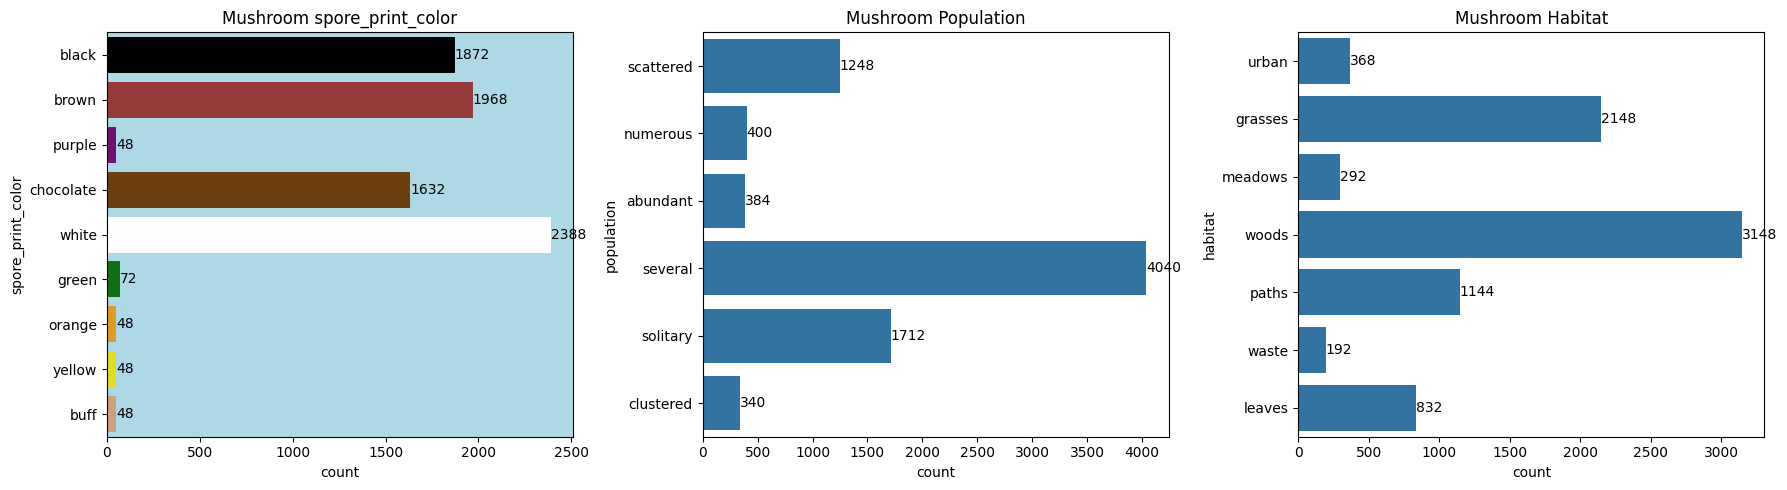

In [83]:
plt.figure(figsize=(18,5))

# spore_print_color

ax1 = plt.subplot2grid((1,3),(0,0))

sns.countplot(y='spore_print_color', data=data, ax=ax1, palette=['#000000','#A52A2A','#800080','#7B3F00','#FFFFFF',
                                                                     '#008000','#FFA500','#FFFF00','#DAA06D'])
for i in ax1.containers:
    ax1.bar_label(i)
ax1.set_facecolor('lightblue')
plt.title("Mushroom spore_print_color")

# population

ax2 = plt.subplot2grid((1,3),(0,1))

sns.countplot(y='population', data=data, ax=ax2)
for i in ax2.containers:
    ax2.bar_label(i)
plt.title("Mushroom Population")

# habitat

ax3 = plt.subplot2grid((1,3),(0,2))

sns.countplot(y='habitat', data=data, ax=ax3)
for i in ax3.containers:
    ax3.bar_label(i)
plt.title("Mushroom Habitat")

plt.tight_layout()
plt.show()

### Insights :

Class:
The target column exhibits a distribution of two classes: 'poisonous' with 3916 and 'edible' with 4208 occurrences. This distribution suggests a relatively balanced dataset, as the counts for both classes are comparable.

Cap Shape: 
Most mushrooms have a convex cap shape, followed by flat and knobbed shapes.

Cap Surface:
The majority of mushrooms have a scaly cap surface, followed by smooth and fibrous surfaces.

Cap Color:
Brown is the most common cap color, followed by gray and red.
There are various less common colors like yellow, white, buff, pink, cinnamon, purple, and green.

Bruises:
More mushrooms in the dataset have no bruises compared to those with bruises.

Odor:
The majority of mushrooms have no distinct odor (none).
Foul and fishy odors are also relatively common.

Gill Attachment:
Most mushrooms have free gill attachment.

Gill Spacing:
The majority of mushrooms have close gill spacing.

Gill Size:
Broad gill size is more common than narrow.

Gill Color:
Buff, pink, and white are the most common gill colors.
Some mushrooms have rare colors like black, red, yellow, orange, and green.

Stalk Shape:
Tapering stalk shape is more common than enlarging.

Stalk Root:
Bulbous stalk roots are predominant.

Stalk Surface Above Ring:
Smooth stalk surface above the ring is most common.

Stalk Surface Below Ring:
Smooth stalk surface below the ring is most common.

Stalk Color Above Ring:
White is the most common color above the ring.

Stalk Color Below Ring:
White is the most common color below the ring.

Veil Color:
Most mushrooms have a white veil color.

Ring Number:
Most mushrooms have one ring.

Ring Type:
Pendant and evanescent ring types are more common than large, flaring, or no rings.

Spore Print Color:
White and brown are the most common spore print colors.

Population:
Mushrooms with several populations are the most common.

Habitat:
Woods and grasses are the most common habitats.


### Bivariate Analysis

### cap-shape vs class

In [84]:
CapShapeClass = data.groupby(['class','cap_shape']).size().reset_index().pivot(
    columns='class',index='cap_shape',values=0).rename(columns={0:"counts"})
CapShapeClass

class,edible,poisonous
cap_shape,,
bell,404.0,48.0
conical,NaN,4.0
convex,1948.0,1708.0
flat,1596.0,1556.0
knobbed,228.0,600.0
sunken,32.0,NaN


### bruises vs class

In [85]:
BruisesClass = data.groupby(['class','bruises']).size().reset_index().pivot(
    columns='class',index='bruises',values=0).rename(columns={0:"counts"})
BruisesClass

class,edible,poisonous
bruises,,
no,1456,3292
yes,2752,624


### odor vs class

In [86]:
OdorClass = data.groupby(['class','odor']).size().reset_index().pivot(
    columns='class',index='odor',values=0).rename(columns={0:"counts"})
OdorClass

class,edible,poisonous
odor,,
almond,400.0,NaN
anise,400.0,NaN
creosote,NaN,192.0
fishy,NaN,576.0
foul,NaN,2160.0
musty,NaN,36.0
none,3408.0,120.0
pungent,NaN,256.0
spicy,NaN,576.0


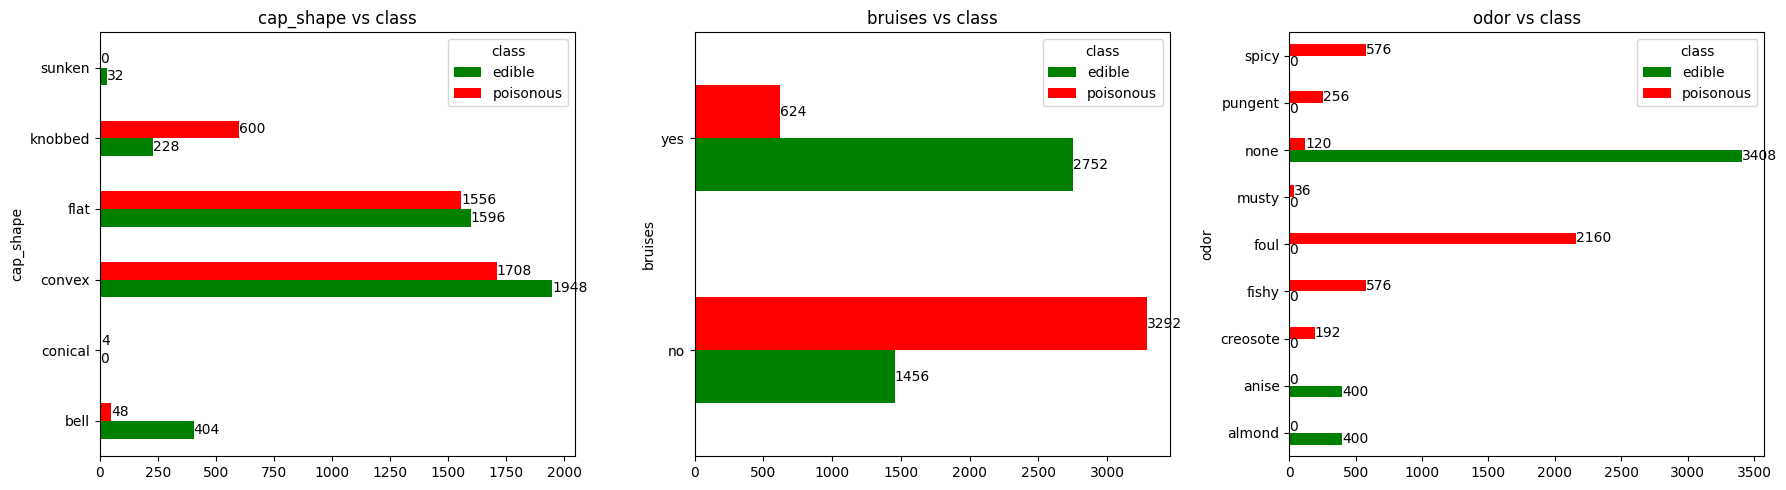

In [91]:
plt.figure(figsize=(18,5))

# cap-shape vs class

ax1 = plt.subplot2grid((1,3),(0,0))

CapShapeClass.plot(kind='barh',stacked=False,ax=ax1, color=['green','red'])
for i in ax1.containers:
    ax1.bar_label(i)
plt.title("cap_shape vs class")

# bruises vs class

ax2 = plt.subplot2grid((1,3),(0,1))

BruisesClass.plot(kind='barh',stacked=False,ax=ax2, color=['green','red'])
for i in ax2.containers:
    ax2.bar_label(i)
plt.title("bruises vs class")

# odor vs class

ax3 = plt.subplot2grid((1,3),(0,2))

OdorClass.plot(kind='barh',stacked=False,ax=ax3, color=['green','red'])
for i in ax3.containers:
    ax3.bar_label(i)
plt.title("odor vs class")

plt.tight_layout()
plt.show()


insight

The dataset reflects that the presence or absence of bruises on a mushroom does not serve as a conclusive indicator of its edibility. Both poisonous and edible mushrooms can exhibit either condition.

### cap_surface vs class

In [93]:
CapSurfaceClass = data.groupby(['class','cap_surface']).size().reset_index().pivot(
    columns='class',index='cap_surface',values=0).rename(columns={0:"counts"})
CapSurfaceClass

class,edible,poisonous
cap_surface,,
fibrous,1560.0,760.0
grooves,NaN,4.0
scaly,1504.0,1740.0
smooth,1144.0,1412.0


### cap_color vs class

In [94]:
CapColorClass = data.groupby(['class','cap_color']).size().reset_index().pivot(
    columns='class',index='cap_color',values=0).rename(columns={0:"counts"})
CapColorClass

class,edible,poisonous
cap_color,,
brown,1264.0,1020.0
buff,48.0,120.0
cinnamon,32.0,12.0
gray,1032.0,808.0
green,16.0,NaN
pink,56.0,88.0
purple,16.0,NaN
red,624.0,876.0
white,720.0,320.0


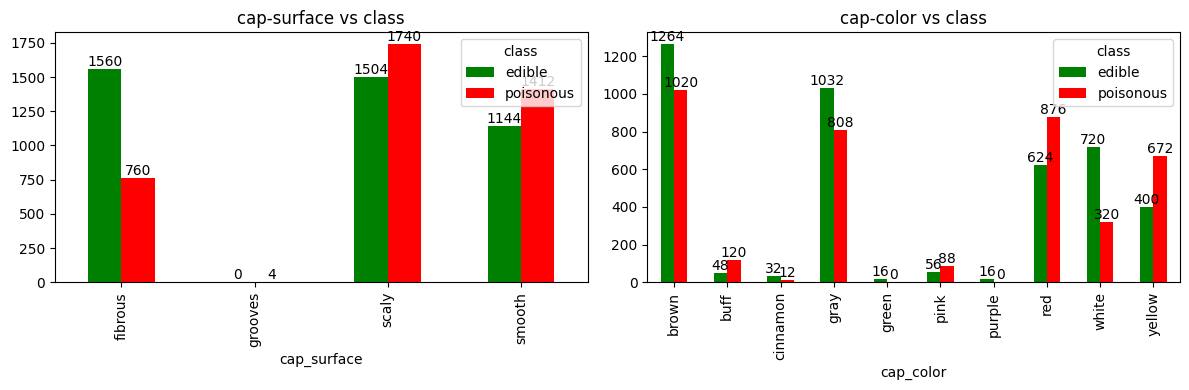

In [99]:
plt.figure(figsize=(12,4))

# cap_surface vs class

ax1 = plt.subplot2grid((1,2),(0,0))

CapSurfaceClass.plot(kind='bar',stacked=False,ax=ax1, color=['green','red'])
for i in ax1.containers:
    ax1.bar_label(i)
plt.title("cap-surface vs class")

# cap_color vs class

ax2 = plt.subplot2grid((1,2),(0,1))

CapColorClass.plot(kind='bar',stacked=False,ax=ax2, color=['green','red'])
for i in ax2.containers:
    ax2.bar_label(i)
plt.title("cap-color vs class")

plt.tight_layout()
plt.show()

insight:

The dataset reveals the presence of four distinct types of cap surfaces in mushrooms. Notably, our findings indicate that 'edible' mushrooms are consistently absent in the category where 'cap-surface' is grooves.

### gill_attachment vs class

In [100]:
GillAttachmentClass = data.groupby(['class','gill_attachment']).size().reset_index().pivot(
    columns='class',index='gill_attachment',values=0).rename(columns={0:"counts"})
GillAttachmentClass

class,edible,poisonous
gill_attachment,,
attached,192,18
free,4016,3898


### gill_spacing vs class

In [101]:
GillSpacingClass = data.groupby(['class','gill_spacing']).size().reset_index().pivot(
    columns='class',index='gill_spacing',values=0).rename(columns={0:"counts"})
GillSpacingClass

class,edible,poisonous
gill_spacing,,
close,3008,3804
crowded,1200,112


### gill_size vs class

In [102]:
GillSizeClass = data.groupby(['class','gill_size']).size().reset_index().pivot(
    columns='class',index='gill_size',values=0).rename(columns={0:"counts"})
GillSizeClass

class,edible,poisonous
gill_size,,
broad,3920,1692
narrow,288,2224


### gill_color vs class

In [103]:
GillColorClass = data.groupby(['class','gill_color']).size().reset_index().pivot(
    columns='class',index='gill_color',values=0).rename(columns={0:"counts"})
GillColorClass

class,edible,poisonous
gill_color,,
black,344.0,64.0
brown,936.0,112.0
buff,NaN,1728.0
chocolate,204.0,528.0
gray,248.0,504.0
green,NaN,24.0
orange,64.0,NaN
pink,852.0,640.0
purple,444.0,48.0


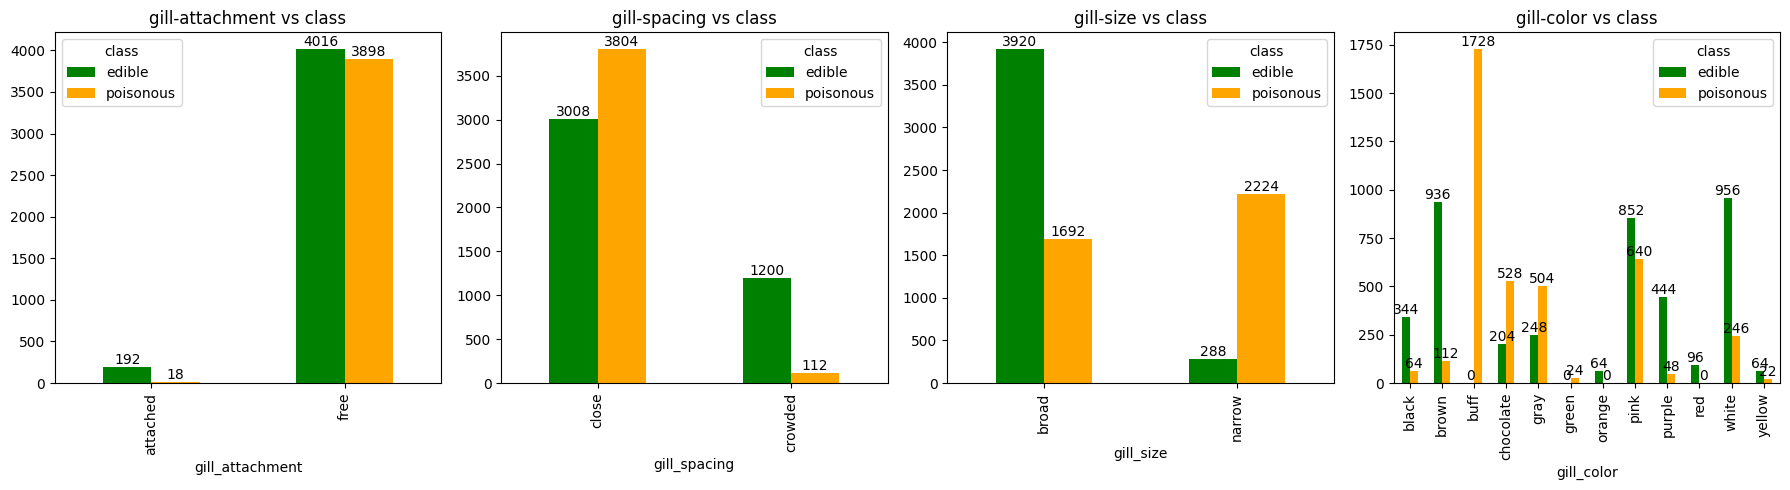

In [111]:
plt.figure(figsize=(18,5))

# gill-attachment vs class

ax1 = plt.subplot2grid((1,4),(0,0))

GillAttachmentClass.plot(kind='bar',stacked=False,ax=ax1, color=['green','orange'])
for i in ax1.containers:
    ax1.bar_label(i)
plt.title("gill-attachment vs class")

# gill-spacing vs class

ax2 = plt.subplot2grid((1,4),(0,1))

GillSpacingClass.plot(kind='bar',stacked=False,ax=ax2, color=['green','orange'])
for i in ax2.containers:
    ax2.bar_label(i)
plt.title("gill-spacing vs class")

# gill-size vs class

ax3 = plt.subplot2grid((1,4),(0,2))

GillSizeClass.plot(kind='bar',stacked=False,ax=ax3, color=['green','orange'])
for i in ax3.containers:
    ax3.bar_label(i)
plt.title("gill-size vs class")

# gill-color vs class

ax4 = plt.subplot2grid((1,4),(0,3))

GillColorClass.plot(kind='bar',stacked=False,ax=ax4, color=['green','orange'])
for i in ax4.containers:
    ax4.bar_label(i)
plt.title("gill-color vs class")

plt.tight_layout()
plt.show()

insights:

Our data indicates that the gill spacing of a mushroom, whether categorized as "Close" or "Crowded," does not exclusively determine its edibility. Both poisonous and edible mushrooms can exhibit either gill spacing characteristics.

The gill size of a mushroom, whether classified as "Narrow" or "Broad," does not serve as a definitive factor in determining its edibility. Both poisonous and edible mushrooms can manifest either gill size attribute, emphasizing the importance of considering additional variables for accurate classification.

it is observed that mushrooms categorized as 'edible' typically lack the Gill Colors 'Buff' and 'Green,' while those labeled as 'poisonous' do not exhibit Gill Colors of 'Red' or 'Orange.' This information underscores the distinctive associations between certain Gill Colors and the edibility status of mushrooms in our data.

### stalk-shape vs class

In [112]:
StalkShapeClass = data.groupby(['class','stalk_shape']).size().reset_index().pivot(
    columns='class',index='stalk_shape',values=0).rename(columns={0:"counts"})
StalkShapeClass

class,edible,poisonous
stalk_shape,,
enlarging,1616,1900
tapering,2592,2016


### stalk_root vs class

In [113]:
StalkRootClass = data.groupby(['class','stalk_root']).size().reset_index().pivot(
    columns='class',index='stalk_root',values=0).rename(columns={0:"counts"})
StalkRootClass

class,edible,poisonous
stalk_root,,
bulbous,2640.0,3616.0
club,512.0,44.0
equal,864.0,256.0
rooted,192.0,NaN


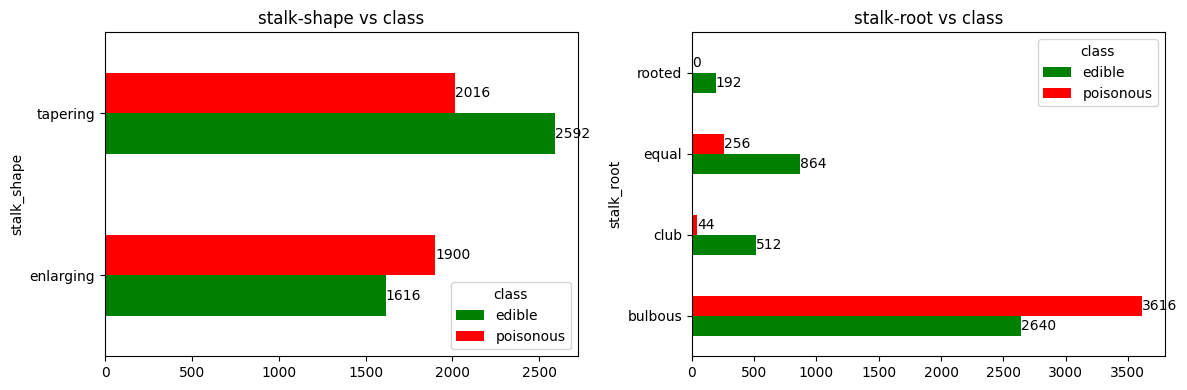

In [114]:
plt.figure(figsize=(12,4))

# stalk-shape vs class

ax1 = plt.subplot2grid((1,2),(0,0))

StalkShapeClass.plot(kind='barh',stacked=False,ax=ax1, color=['green','red'])
for i in ax1.containers:
    ax1.bar_label(i)
plt.title("stalk-shape vs class")

# stalk-root vs class

ax2 = plt.subplot2grid((1,2),(0,1))

StalkRootClass.plot(kind='barh',stacked=False,ax=ax2, color=['green','red'])
for i in ax2.containers:
    ax2.bar_label(i)
plt.title("stalk-root vs class")

plt.tight_layout()
plt.show()

insight:

Mushrooms categorized as 'poisonous' uniformly lack the Stalk Root type characterized as 'Rooted.' This pattern emphasizes a consistent association between the absence of the 'Rooted' stalk root and the poisonous classification of mushrooms in our data.

### stalk_surface_above_ring vs class

In [115]:
StalkSurfaceAboveRingClass = data.groupby(['class','stalk_surface_above_ring']).size().reset_index().pivot(
    columns='class',index='stalk_surface_above_ring',values=0).rename(columns={0:"counts"})
StalkSurfaceAboveRingClass

class,edible,poisonous
stalk_surface_above_ring,,
fibrous,408,144
scaly,16,8
silky,144,2228
smooth,3640,1536


### stalk_surface_below_ring vs class

In [116]:
StalkSurfaceBelowRingClass = data.groupby(['class','stalk_surface_below_ring']).size().reset_index().pivot(
    columns='class',index='stalk_surface_below_ring',values=0).rename(columns={0:"counts"})
StalkSurfaceBelowRingClass

class,edible,poisonous
stalk_surface_below_ring,,
fibrous,456,144
scaly,208,76
silky,144,2160
smooth,3400,1536


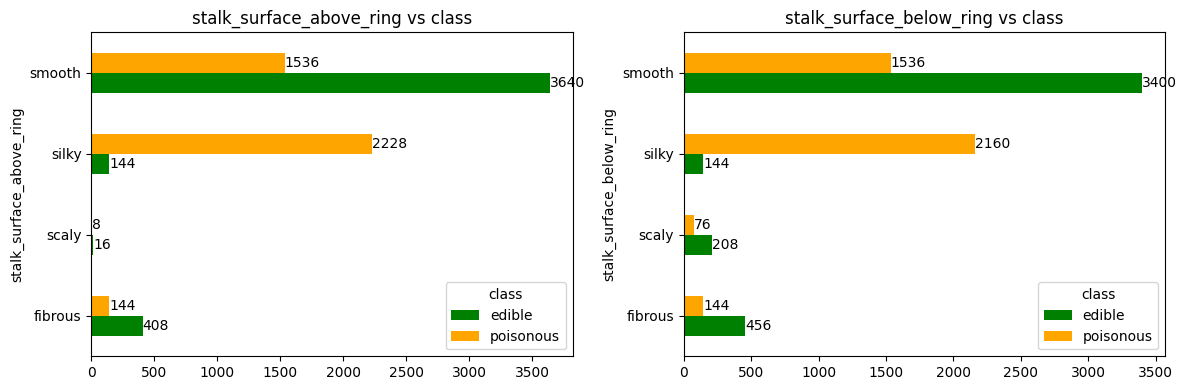

In [117]:
plt.figure(figsize=(12,4))

# stalk_surface_above_ring vs class

ax1 = plt.subplot2grid((1,2),(0,0))

StalkSurfaceAboveRingClass.plot(kind='barh',stacked=False,ax=ax1, color=['green','orange'])
for i in ax1.containers:
    ax1.bar_label(i)
plt.title("stalk_surface_above_ring vs class")

# stalk_surface_below_ring vs class

ax2 = plt.subplot2grid((1,2),(0,1))

StalkSurfaceBelowRingClass.plot(kind='barh',stacked=False,ax=ax2, color=['green','orange'])
for i in ax2.containers:
    ax2.bar_label(i)
plt.title("stalk_surface_below_ring vs class")

plt.tight_layout()
plt.show()

insights:

Mushrooms can exhibit Stalk-Surface-Above-Ring characteristics such as 'Smooth,' 'Fibrous,' 'Silky,' or 'Scaly,' and their edibility is not exclusively determined by these attributes. Both poisonous and edible mushrooms may present any of these stalk surface type.

Mushrooms may display Stalk-Surface-Below-Ring characteristics such as 'Smooth,' 'Fibrous,' 'Silky,' or 'Scaly,' and their edibility is not definitively determined by these attributes alone. Both poisonous and edible mushrooms can manifest any of these stalk surface types, underscoring the necessity of considering additional factors for precise classification.

### stalk_color_above_ring vs class

In [26]:
StalkColorAboveRingClass = data.groupby(['class','stalk_color_above_ring']).size().reset_index().pivot(
    columns='class',index='stalk_color_above_ring',values=0).rename(columns={0:"counts"})
StalkColorAboveRingClass

class,edible,poisonous
stalk_color_above_ring,,
brown,16.0,432.0
buff,NaN,432.0
cinnamon,NaN,36.0
gray,576.0,NaN
orange,192.0,NaN
pink,576.0,1296.0
red,96.0,NaN
white,2752.0,1712.0
yellow,NaN,8.0


### stalk_color_below_ring vs class

In [27]:
StalkColorBelowRingClass = data.groupby(['class','stalk_color_below_ring']).size().reset_index().pivot(
    columns='class',index='stalk_color_below_ring',values=0).rename(columns={0:"counts"})
StalkColorBelowRingClass

class,edible,poisonous
stalk_color_below_ring,,
brown,64.0,448.0
buff,NaN,432.0
cinnamon,NaN,36.0
gray,576.0,NaN
orange,192.0,NaN
pink,576.0,1296.0
red,96.0,NaN
white,2704.0,1680.0
yellow,NaN,24.0


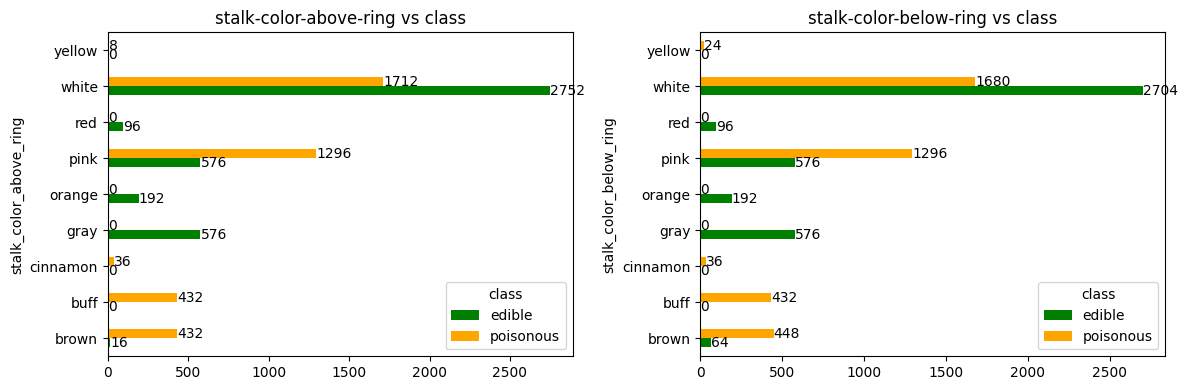

In [118]:
plt.figure(figsize=(12,4))

# stalk-color-above-ring vs class

ax1 = plt.subplot2grid((1,2),(0,0))

StalkColorAboveRingClass.plot(kind='barh',stacked=False,ax=ax1, color=['green','orange'])
for i in ax1.containers:
    ax1.bar_label(i)
plt.title("stalk-color-above-ring vs class")

# stalk-color-below-ring vs class

ax2 = plt.subplot2grid((1,2),(0,1))

StalkColorBelowRingClass.plot(kind='barh',stacked=False,ax=ax2, color=['green','orange'])
for i in ax2.containers:
    ax2.bar_label(i)
plt.title("stalk-color-below-ring vs class")

plt.tight_layout()
plt.show()


### veil-color vs class

In [31]:
VeilColorClass = data.groupby(['class','veil_color']).size().reset_index().pivot(
    columns='class',index='veil_color',values=0).rename(columns={0:"counts"})
VeilColorClass

class,edible,poisonous
veil_color,,
brown,96.0,NaN
orange,96.0,NaN
white,4016.0,3908.0
yellow,NaN,8.0


### ring_number vs class

In [32]:
RingNumberClass = data.groupby(['class','ring_number']).size().reset_index().pivot(
    columns='class',index='ring_number',values=0).rename(columns={0:"counts"})
RingNumberClass

class,edible,poisonous
ring_number,,
none,NaN,36.0
one,3680.0,3808.0
two,528.0,72.0


### ring_type vs class

In [33]:
RingTypeClass = data.groupby(['class','ring_type']).size().reset_index().pivot(
    columns='class',index='ring_type',values=0).rename(columns={0:"counts"})
RingTypeClass

class,edible,poisonous
ring_type,,
evanescent,1008.0,1768.0
flaring,48.0,NaN
large,NaN,1296.0
none,NaN,36.0
pendant,3152.0,816.0


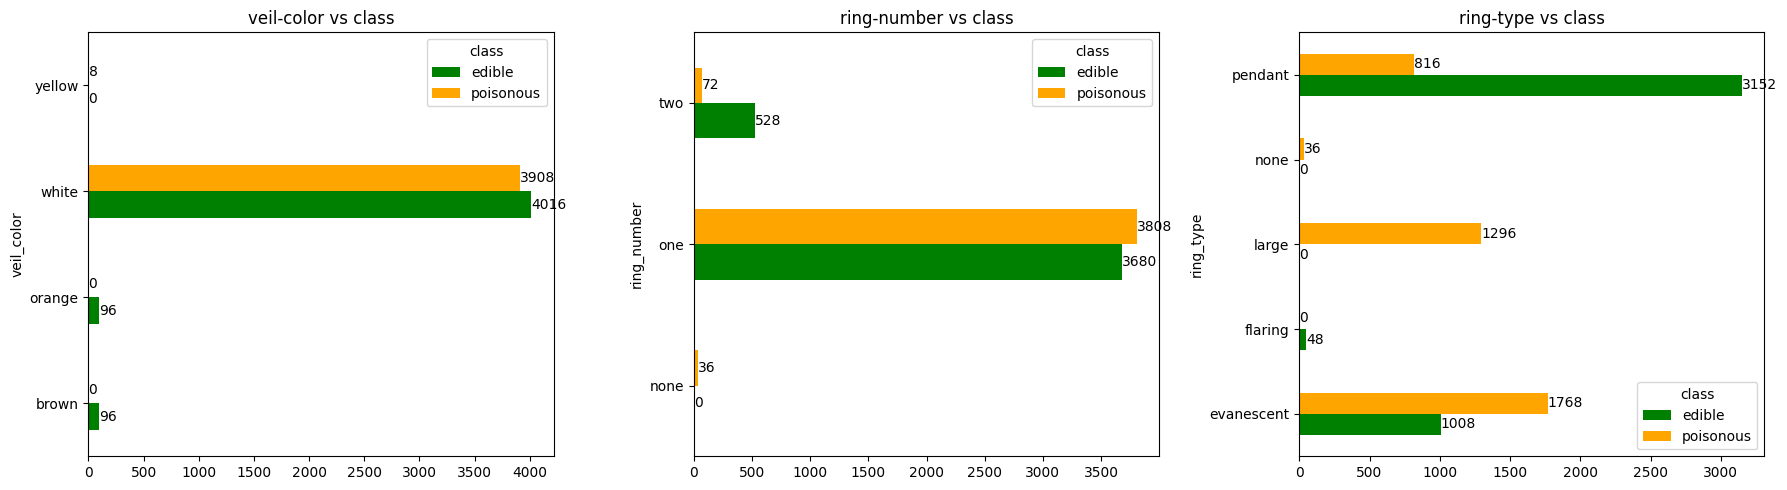

In [119]:
plt.figure(figsize=(18,5))

# veil-color vs class

ax1 = plt.subplot2grid((1,3),(0,0))

VeilColorClass.plot(kind='barh',stacked=False,ax=ax1, color=['green','orange'])
for i in ax1.containers:
    ax1.bar_label(i)
plt.title("veil-color vs class")

# ring-number vs class

ax2 = plt.subplot2grid((1,3),(0,1))

RingNumberClass.plot(kind='barh',stacked=False,ax=ax2, color=['green','orange'])
for i in ax2.containers:
    ax2.bar_label(i)
plt.title("ring-number vs class")

# ring-type vs class

ax3 = plt.subplot2grid((1,3),(0,2))

RingTypeClass.plot(kind='barh',stacked=False,ax=ax3, color=['green','orange'])
for i in ax3.containers:
    ax3.bar_label(i)
plt.title("ring-type vs class")

plt.tight_layout()
plt.show()

insight:

As per our dataset, mushrooms identified as 'edible' consistently do not feature Veil Color labeled as 'yellow'. Conversely, mushrooms categorized as 'poisonous' do not display Veil Colors characterized as 'orange' and 'brown'.

Mushrooms categorized as 'edible' uniformly do not exhibit a Ring Number characterized as 'None.' This observation underscores a consistent association between the absence of a ring and the edibility status of mushrooms in our data.

It is observed that mushrooms labeled as 'edible' consistently lack the Ring Types categorized as 'Large' and 'None.' Conversely, mushrooms classified as 'poisonous' do not exhibit the Ring Type characterized as 'Flaring.' 

### spore_print_color vs class

In [42]:
SporePrintColorClass = data.groupby(['class','spore_print_color']).size().reset_index().pivot(
    columns='class',index='spore_print_color',values=0).rename(columns={0:"counts"})
SporePrintColorClass

class,edible,poisonous
spore_print_color,,
black,1648.0,224.0
brown,1744.0,224.0
buff,48.0,NaN
chocolate,48.0,1584.0
green,NaN,72.0
orange,48.0,NaN
purple,48.0,NaN
white,576.0,1812.0
yellow,48.0,NaN


### population vs class

In [43]:
PopulationClass = data.groupby(['class','population']).size().reset_index().pivot(
    columns='class',index='population',values=0).rename(columns={0:"counts"})
PopulationClass

class,edible,poisonous
population,,
abundant,384.0,NaN
clustered,288.0,52.0
numerous,400.0,NaN
scattered,880.0,368.0
several,1192.0,2848.0
solitary,1064.0,648.0


### habitat vs class

In [44]:
HabitatClass = data.groupby(['class','habitat']).size().reset_index().pivot(
    columns='class',index='habitat',values=0).rename(columns={0:"counts"})
HabitatClass

class,edible,poisonous
habitat,,
grasses,1408.0,740.0
leaves,240.0,592.0
meadows,256.0,36.0
paths,136.0,1008.0
urban,96.0,272.0
waste,192.0,NaN
woods,1880.0,1268.0


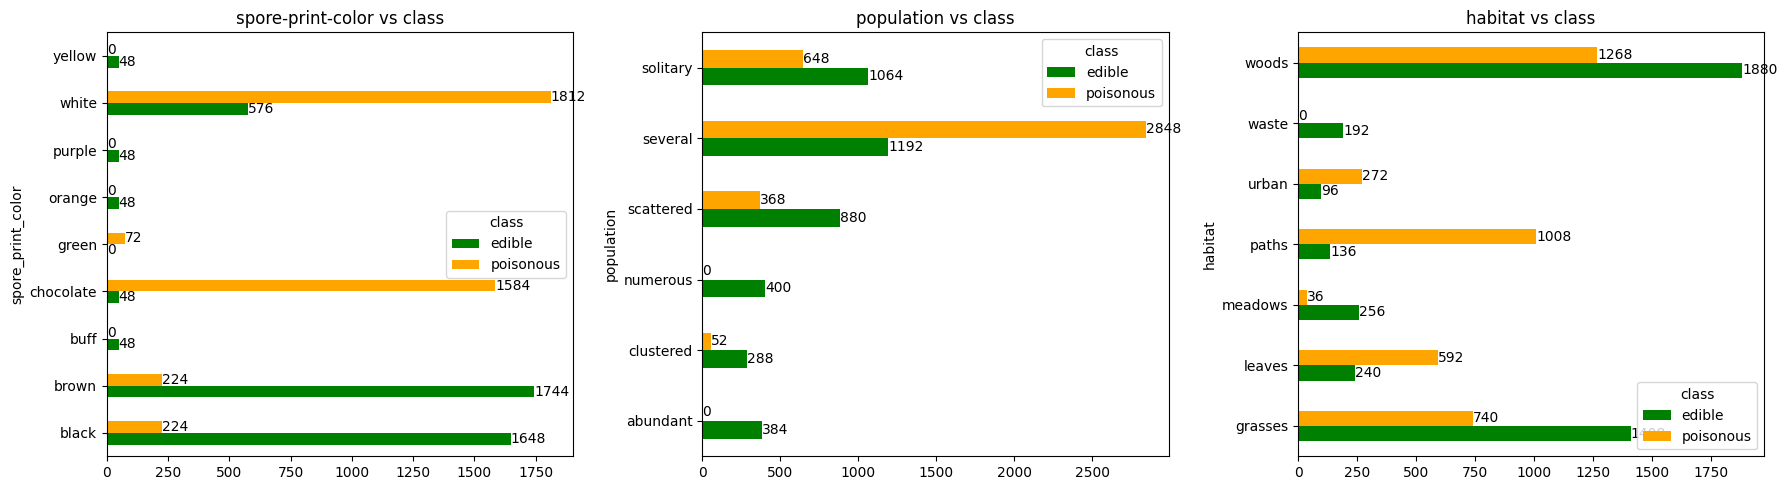

In [120]:
plt.figure(figsize=(18,5))

# spore-print-color vs class

ax1 = plt.subplot2grid((1,3),(0,0))

SporePrintColorClass.plot(kind='barh',stacked=False,ax=ax1, color=['green','orange'])
for i in ax1.containers:
    ax1.bar_label(i)
plt.title("spore-print-color vs class")

# population vs class

ax2 = plt.subplot2grid((1,3),(0,1))

PopulationClass.plot(kind='barh',stacked=False,ax=ax2, color=['green','orange'])
for i in ax2.containers:
    ax2.bar_label(i)
plt.title("population vs class")

# habitat vs class

ax3 = plt.subplot2grid((1,3),(0,2))

HabitatClass.plot(kind='barh',stacked=False,ax=ax3, color=['green','orange'])
for i in ax3.containers:
    ax3.bar_label(i)
plt.title("habitat vs class")

plt.tight_layout()
plt.show()

insights:

Mushrooms labeled as 'edible' do not possess Spore-Print-Color categorized as 'Green'. Conversely, mushrooms identified as 'poisonous' do not showcase Spore-Print-Colors characterized as 'Purple,' 'Orange', 'Yellow' and 'Buff'. 

Mushrooms classified as 'poisonous' consistently lack the Population Types characterized as 'Numerous' and 'Abundant'.

Mushrooms categorized as 'poisonous' do not exhibit the Habitat Type labeled as 'Waste'.This pattern underscores a clear association between the absence of the 'Waste' habitat type and the poisonous classification of mushrooms in our data.